# Getting Started

In this project, We will analyze datasets containing data on restaurants, consumers and user-item-rating. The goal of this project is to implement Collaborative Filtering i.e., to find similarities between various consumers and recommend restaurants to consumers.

The datasets for this project can be found on [Kaggle](https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings). 

The following code loads the datasets, along with a few of the necessary Python libraries required for this project.

In [120]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline


In [121]:
print('Loading restaurant datasets')

# Load Restaurant Payment dataset
try:
    rest_pay = pd.read_csv('chefmozaccepts.csv')
    print('Payment dataset has %d samples with %d features each.' % (rest_pay.shape))
except:
    print('Payment dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Cuisine dataset
try:
    rest_cuisine = pd.read_csv('chefmozcuisine.csv')
    print('Cuisine dataset has %d samples with %d features each.' % (rest_cuisine.shape))
except:
    print('Cuisine dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Hours dataset
try:
    rest_hours = pd.read_csv('chefmozhours4.csv')
    print('Hours dataset has %d samples with %d features each.' % (rest_hours.shape))
except:
    print('Hours dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Parking dataset
try:
    rest_parking = pd.read_csv('chefmozparking.csv')
    print('Parking dataset has %d samples with %d features each.' % (rest_parking.shape))
except:
    print('Parking dataset could not be loaded. Is the dataset missing?')

#Load Restaurant Geo-places dataset
try:
    rest_geo = pd.read_csv('geoplaces2.csv')
    print('Geo-places dataset has %d samples with %d features each.' % (rest_geo.shape))
except:
    print('Geo-places dataset could not be loaded. Is the dataset missing?')

print('\n')

print('Loading consumer datasets')

# Load the Consumer Cuisine dataset
try:
    cons_cuisine = pd.read_csv('usercuisine.csv')
    print('Cuisine dataset has %d samples with %d features each.' % (cons_cuisine.shape))
except:
    print('Cuisine dataset could not be loaded. Is the dataset missing?')

#Load Consumer Payment dataset
try:
    cons_pay = pd.read_csv('userpayment.csv')
    print('Payment dataset has %d samples with %d features each.' % (cons_pay.shape))
except:
    print('Payment dataset could not be loaded. Is the dataset missing?')

#Load Consumer Profile dataset
try:
    cons_profile = pd.read_csv('userprofile.csv')
    print('Profile dataset has %d samples with %d features each.' % (cons_profile.shape))
except:
    print('Profile dataset could not be loaded. Is the dataset missing?')
    
print('\n')

print('Loading User-Item-Rating dataset')

#Load Rating dataset
try:
    rating = pd.read_csv('rating_final.csv')
    print('Rating dataset has %d samples with %d features each.' % (rating.shape))
except:
    print('Rating dataset could not be loaded. Is the dataset missing?')
    


Loading restaurant datasets
Payment dataset has 1314 samples with 2 features each.
Cuisine dataset has 916 samples with 2 features each.
Hours dataset has 2339 samples with 3 features each.
Parking dataset has 702 samples with 2 features each.
Geo-places dataset has 130 samples with 21 features each.


Loading consumer datasets
Cuisine dataset has 330 samples with 2 features each.
Payment dataset has 177 samples with 2 features each.
Profile dataset has 138 samples with 19 features each.


Loading User-Item-Rating dataset
Rating dataset has 1161 samples with 5 features each.


# Data Exploration

In this section, we will begin exploring the data through visualizations and code to understand how features of each dataset are related to one another.

Resturant datasets:<br>
1. rest_pay: 'placeID', 'Rpayment'<br>
2. rest_cuisine: 'placeID', 'Rcuisine' <br>
3. rest_hours: 'placeID', 'hours', 'days' <br>
4. rest_parking: 'placeID', 'parking_lot' <br>
5. rest_geo: 'placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address','city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area','dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise','area', 'other_services'<br>

User datasets:<br>
1. cons_pay: 'userID', 'Upayment'<br>
2. cons_cuisine: 'userID', 'Rcuisine'<br>
3. cons_profile: 'userID', 'latitude', 'longitude', 'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'birth_year', 'interest', 'personality', 'religion', 'activity', 'color', 'weight', 'budget', 'height' <br>

Rating dataset:
1. rating: 'userID', 'placeID', 'rating', 'food_rating', 'service_rating'


In [122]:
#No.of users who are given ratings to the restaurants
list_users = rating.userID.unique()
print(len(list_users))

138


In [123]:
#Delete users from cons_profile who have not given ratings
for index, row in cons_profile.iterrows():
    if row['userID'] not in list_users:
        del row

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a1e4b08d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3a05235940>]], dtype=object)

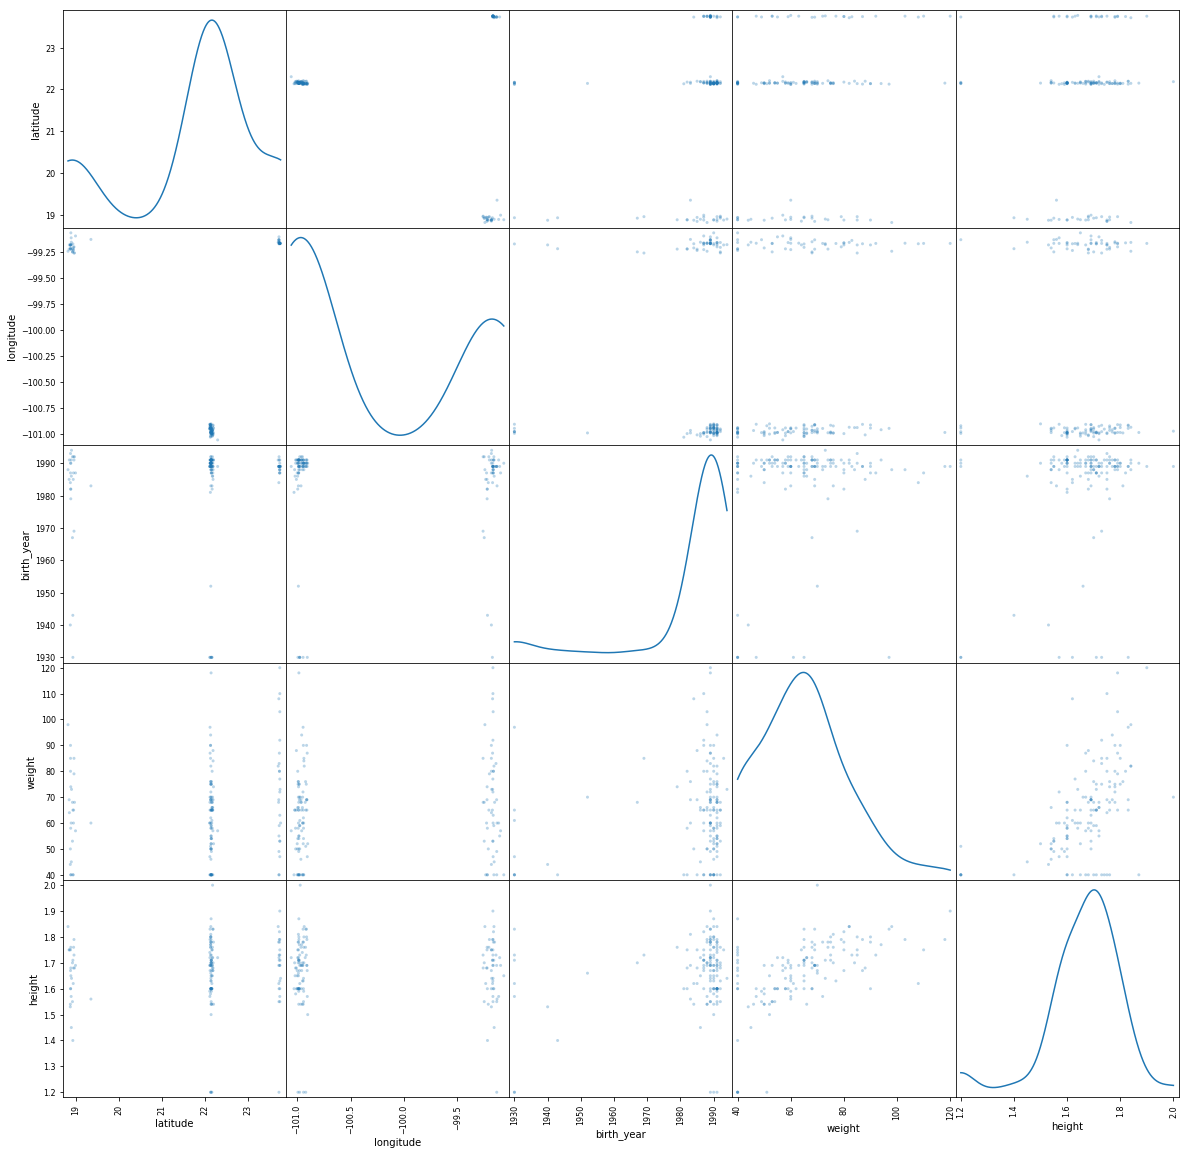

In [124]:
# #Scatter matrix for continuous values in the user dataset
pd.plotting.scatter_matrix(cons_profile, alpha = 0.3, figsize = (20,20), diagonal = 'kde')
# #From the graph below, we know that there's a correlation between weight and height and therefore we can remove one of them.

In [125]:
# #Remove Height since it shows high correlation with Weight
cons_profile = cons_profile.drop('height', axis = 1)

## Checking and replacing missing values in the datasets

### Restaurant Dataset

In [126]:
#The code below gives True if any of the attributes contain missing values
# print('Retaurant:\n',rest_final.isin(['?']).any(), end = '\n\n')
print('Customer:\n',cons_profile.isin(['?']).any())

Customer:
 userID              False
latitude            False
longitude           False
smoker               True
drink_level         False
dress_preference     True
ambience             True
transport            True
marital_status       True
hijos                True
birth_year          False
interest            False
personality         False
religion            False
activity             True
color               False
weight              False
budget               True
dtype: bool


### User Dataset

In [127]:
#Store indices of features having 'Nan' or '?' values
indices = set() #to store unique values
for index,row in cons_profile.iterrows():
    for i in range(len(row)):
        if row[i] is np.nan or row [i] is '?':
            indices.add(i)

In [128]:
#Features having 'Nan' or '?' values
missing = list(cons_profile.columns[list(indices)])
print(missing)

['smoker', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'activity', 'budget']


In [129]:
#Only the features with categorical data have missing values
#Replace 'Nan' or '?' with a random value from the feature
import random 
for attr in missing:
    uni = list(cons_profile[attr].unique()) #List of all unique values in the feature
    if '?' in uni:
        uni.remove('?') #remove '?' if present in the list
    if np.nan in uni:
        uni.remove(np.nan) #remove 'Nan' if present in the list
    i=0
    for value in cons_profile[attr]: 
        if value is np.nan or value is '?':
            cons_profile[attr][i] = cons_profile[attr][i].replace(value,random.choice(uni)) #replace it with a random item from the list
        i+=1

/home/kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [130]:
len(cons_profile)

138

## Encoding String/Object type data into Integer

In [131]:
data = cons_profile.copy()
data = data.drop('userID', axis = 1)

In [132]:
len(data)

138

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data['drink_level'] = le.fit_transform(data['drink_level'])
data['dress_preference'] = le.fit_transform(data['dress_preference'])
data['ambience'] = le.fit_transform(data['ambience'])
data['transport'] = le.fit_transform(data['transport'])
data['marital_status'] = le.fit_transform(data['marital_status'])
data['hijos'] = le.fit_transform(data['hijos'])
data['interest'] = le.fit_transform(data['interest'])
data['personality'] = le.fit_transform(data['personality'])
data['religion'] = le.fit_transform(data['religion'])
data['activity'] = le.fit_transform(data['activity'])
data['color'] = le.fit_transform(data['color'])
data['budget'] = le.fit_transform(data['budget'])
data['longitude'] = le.fit_transform(data['longitude'])
data['latitude'] = le.fit_transform(data['latitude'])

In [134]:
from sklearn.utils import shuffle
data = shuffle(data)
# test_size = int(0.1*len(data))
test_size = np.random.rand(len(data)) < 0.1
cons_train = data[~test_size]
cons_test = data[test_size]
print(len(cons_train))
print(len(cons_test))

118
20


In [135]:
print(cons_train.columns)

Index(['latitude', 'longitude', 'smoker', 'drink_level', 'dress_preference',
       'ambience', 'transport', 'marital_status', 'hijos', 'birth_year',
       'interest', 'personality', 'religion', 'activity', 'color', 'weight',
       'budget'],
      dtype='object')


In [137]:
len(cons_test)

20

In [138]:
len(cons_train)

118

In [139]:
print(cons_train.index)

Int64Index([ 31, 114,  33, 134,  98,  47,  32, 137,   7,  40,
            ...
             79, 135,  36, 129,  86, 130,   3,  93,   2,  74],
           dtype='int64', length=118)


In [148]:
train_users = []
for index,row in cons_train.iterrows():
    train_users.append(index)
test_users = []
for index,row in cons_test.iterrows():
    test_users.append(index)

sample_user_index = random.choice(test_users)

In [142]:
for index,row in cons_test.iterrows():
    if index == sample_user_index:
        test = pd.DataFrame(row.values.reshape(1,17))

In [143]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,68,32,0,0,3,2,2,1,0,1930,1,1,4,3,7,40,2


In [144]:
res = pd.DataFrame()

In [145]:
n = len(cons_train)

In [146]:
from sklearn.neighbors import KDTree
tree = KDTree(cons_train)
dist, ind = tree.query(test, k=n)
val = []
for i in ind:
    for j in i:
        val.append(j)
i = 0
for index,row in cons_train.iterrows():
    if i in val:
        res = res.append(row)
    i+=1

In [150]:
print(dist)

[[   7.74596669   24.73863375   26.15339366   58.47221562   58.83026432
    59.3295879    60.35726965   60.90976933   62.19324722   62.40993511
    62.45798588   62.8251542    63.33245613   63.63175308   63.63175308
    63.78087488   63.82005954   64.17943596   64.81512169   64.89221833
    65.63535633   65.71149062   66.10597552   67.26068688   67.6461381
    67.88961629   68.01470429   68.03675477   68.23488844   68.30080527
    68.93475176   69.24593851   69.72804314   70.25667228   70.34912935
    70.38465742   70.46985171   70.56911506   70.87312608   71.
    71.63099888   71.73562574   71.81225522   71.84705979   72.05553414
    72.18032973   72.60853944   73.23933369   73.34848328   73.37574531
    73.39618519   73.57988856   73.74957627   74.78636239   76.12489737
    77.01947806   77.17512553   78.4346862    78.46655338   78.46655338
    78.76547467   79.42921377   80.4673847    80.96912992   80.96912992
    82.60145277   82.77680835   82.80700453   83.68392916   84.29116205
 

In [ ]:
for 

In [149]:
type(dist)

numpy.ndarray

In [73]:
indices  = []
for index,row in res.iterrows():
    indices.append(index)

In [75]:
ids = []
for index,row in cons_profile.iterrows():
    if index in indices:
        ids.append(row[0])

In [186]:
def recommendation(ids):
    all_rest = pd.DataFrame()
    for index,row in rating.iterrows():
        if row[0] in ids:
            all_rest = all_rest.append(row)
    
    all_rest['avg'] = (all_rest['rating'] + all_rest['food_rating'] + all_rest['service_rating']) / 3
    res = all_rest.groupby(['placeID'])['avg'].max()
    res = res.sort_values(ascending = False)
    recommend = res.keys()
    return recommend

In [187]:
recommend = recommendation(ids)

In [195]:
result = pd.DataFrame()
for index,row in rest_geo.iterrows():
    if row[0] in recommend:
        result = result.append(row)

In [197]:
result = result[['placeID','name', 'address','city', 'state', 'country','latitude', 'longitude', 'the_geom_meter', 'fax', 'zip', 'alcohol', 'smoking_area','dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise','area', 'other_services']]

In [198]:
result

,placeID,name,address,city,state,country,latitude,longitude,the_geom_meter,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
9,135082.0,la Estrella de Dimas,Villa de Pozos 192 Villa de Pozos,San Luis Potosi,SLP,Mexico,22.151448,-100.915099,0101000020957F0000A29FAF95CD4958C1FEEEBB73A991...,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none
10,135070.0,Restaurante 75,Villa de Pozos 4497 Villa de Pozos,San Luis Potosi,SLP,Mexico,22.152918,-100.915164,0101000020957F0000ED435B84934958C1B3CF85FA9791...,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,?,familiar,f,closed,none
11,135069.0,Abondance Restaurante Bar,Industrias 908 Valle Dorado,San Luis Potosi,SLP,Mexico,22.140129,-100.944872,0101000020957F000038E5D546B74A58C18FD29AD0D29A...,?,...,Wine-Beer,none,informal,no_accessibility,low,?,familiar,f,closed,none
16,132854.0,Sirlone,carr. mexico,San Luis Potosi,San Luis Potosi,Mexico,22.137863,-100.938327,0101000020957F0000FEC3FB453E4B58C19B4A46361799...,?,...,Wine-Beer,none,informal,completely,medium,?,familiar,f,closed,none
23,132851.0,KFC,?,San Luis Potosi,San Luis Potosi,Mexico,22.136872,-100.934574,0101000020957F0000C74DE39C7F4B58C1061F29171498...,?,...,No_Alcohol_Served,not permitted,informal,completely,low,?,familiar,f,closed,none
30,135054.0,Restaurante y Pescaderia Tampico,Ricardo B. Anaya 2700 Estrella de Oriente,San Luis Potosi,SLP,Mexico,22.140626,-100.915657,0101000020957F000011E92CCE714B58C19BF8C0CA7592...,?,...,No_Alcohol_Served,none,informal,no_accessibility,high,?,familiar,f,closed,none
33,135050.0,Restaurante la Estrella de Dima,Soledad Sn Arboledas de Soledad,Soledad,SLP,Mexico,22.174887,-100.970825,0101000020957F0000FD78FFF7AD4458C1896A33F029A0...,?,...,Wine-Beer,none,informal,no_accessibility,high,?,familiar,f,closed,none
36,135057.0,El Herradero Restaurante and Bar,Costado Sur Central Camionera Km 2,San Luis Potosi,SLP,Mexico,22.145992,-100.955118,0101000020957F000095669021894958C182C9C10E669D...,?,...,Wine-Beer,section,informal,no_accessibility,medium,?,familiar,f,closed,none
44,132869.0,Dominos Pizza,Ricardo B. Anaya,San Luis Potosi,San Luis Potosi,Mexico,22.141238,-100.923925,0101000020957F0000BC62C18D1F4B58C169E0A959C894...,?,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
56,135108.0,Potzocalli,Carretera Central Sn,San Luis Potosi,?,?,22.136253,-100.933585,0101000020957F00008FAE40D59E4B58C112C66046D597...,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none
